# O projeto é uma análise de dados que deve conter as seguintes etapas:

•	Carregar e ler arquivos .csv, xlsx ou de um banco de dados;

•	Avaliar a necessidade da transformação da variável em outra escala (agrupar idade por faixas, por exemplo);

•	Realizar a codificação das variáveis categóricas conforme os valores das variáveis (label encoder, one hot encoder ou target encoder);

•	Normalizar as variáveis;

•	Avaliar a necessidade de realizar o balanceamento da variável alvo;

•	Tratar variáveis com alta correlação;

•	Realizar a seleção de variáveis;

•	Aplicar um modelo de regressão ou classificação utilizando uma técnica de hiperparametrização automática;

•	Aplicar uma medida de avaliação do modelo.

•	Gerar uma visualização para o resultado conforme os tipos abaixo:
    - Agrupamento: gerar a visualização Scatter;
    - Classificação: gerar a matriz de confusão; 
    - Regressão: gerar a visualização da linha de saída.


  Importando Bibliotecas

In [1]:
# DataFrame
import pandas as pd # O 'as' é um alias, um apelido. Ao invés de escrever 'pandas', escrevemos 'pd'
import numpy as np

# Modelos de ML
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import ClusterCentroids, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, TomekLinks, AllKNN, InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import ppscore as pps
# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carregar o arquivo .csv usando o pd.read_csv()

In [2]:
df = pd.read_csv('Pokemon.csv') # Lê o arquivo .csv e armazena em um DataFrame.
df.head() #  Traz os 5 primeiros registros do DataFrame.s

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Avaliar a necessidade da transformação da variável em outra escala (agrupar idade por faixas, por exemplo)

Não vimos necessidade de escalar as variáveis, pois o dataset é pequeno e autoexplicativo.

In [3]:
df.drop(['#'], axis= 1, inplace= True) # Remove a coluna '#'; o axis 1 indica que é uma coluna, se fosse 0, indicaria que é uma linha; inplace=True indica que a alteração é feita no próprio DataFrame.
colunas = ['nome', 'tipo_1', 'tipo_2', 'total', 'hp', 'ataque', 'defesa', 'sp_atq', 'sp_def', 'velocidade', 'geracao', 'lendario'] # traduzindo as colunas e renomeando de uma forma mais amigável para o modelo, tirando espaços e maiúsculas.
df.columns = colunas # Renomeia as colunas do DataFrame.
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Realizar a codificação das variáveis categóricas de acordo com os valores das variáveis (label encoder, one hot encoder ou target encoder)

In [4]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder # Importa a classe LabelEncoder do módulo preprocessing da biblioteca sklearn.

le = LabelEncoder() # O LabelEncoder faz sentido quando a variável categórica é ordinal, ou seja, tem uma ordem natural. O pokemon tem mais 'peso' por ser lendário.

df['lendario'] = le.fit_transform(df['lendario']) # Transforma os valores da coluna lendario em valores numéricos [0-1].
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Normalizar as variáveis

In [5]:
# Antes, uma análise descritiva do DataFrame, é bom para observar valores discrepantes, outliers, e ter uma noção da distribuição dos dados.
df.describe()

,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [6]:
# Antes, vamos tratar os NaN da coluna do tipo_2, pois muitos pokemons não tem 2 tipos de categorias.

df['tipo_2'].fillna('None', inplace= True) # Preenche os valores NaN da coluna tipo_2 com 'None'.
df.isna().sum() # Verifica se há valores NaN no DataFrame.

nome          0
tipo_1        0
tipo_2        0
total         0
hp            0
ataque        0
defesa        0
sp_atq        0
sp_def        0
velocidade    0
geracao       0
lendario      0
dtype: int64

In [7]:
df.head()

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


In [8]:
from sklearn.preprocessing import StandardScaler # Importa a classe StandardScaler do módulo preprocessing da biblioteca sklearn.

# O standardScaler é uma técnica de normalização que transforma os dados para que a média seja 0 e o desvio padrão seja 1.
# Se o valor da variável for menor que a média, o valor transformado será negativo. Se for maior, será positivo. Quanto maior o número, mais próximo, ou até maior que 1 ele será.

scaler = StandardScaler() # Instancia o StandardScaler.
# Vamos usar o Scaler, pois ele é mais sensível a outliers, o que é comum em pokemons lendários. 

# Para manter o DataFrame original, vamos criar um DataFrame com os valores normalizados.

df_norm = df.copy() # Cria uma cópia do DataFrame.

numericals = df.select_dtypes(include=['int64', 'float64']) # Verifica os tipos das colunas int64 e float64.
numericals.drop(columns=['lendario', 'geracao'], inplace= True) # Remove a coluna 'lendario', pois ela é categórica. A 'geracao', pois não faz sentido normalizar.



In [9]:
df_norm[numericals.columns] = scaler.fit_transform(df_norm[numericals.columns]) # Normaliza as colunas int64 e float64.

df_norm.head()


,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,Ivysaur,Grass,Poison,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,0
2,Venusaur,Grass,Poison,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,0
3,VenusaurMega Venusaur,Grass,Poison,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,0
4,Charmander,Fire,None,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,0


In [10]:
df.head() # Como visto, manteve o df original.

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


Analisando a discrepância dos dados usando porcentagem, assim teremos um melhor insight sobre a distribuição dos dados e o que fazer com eles.

In [11]:
# Contagem de Pokémon lendários.
num_lendario = df["lendario"].sum()

# Contagem total de Pokémon.
total_pokemon = len(df)

# Proporção de Pokémon lendários.
proporcao_lendarios = num_lendario / total_pokemon

print(f"Proporção de Pokémon lendários: {proporcao_lendarios:.2%}")

Proporção de Pokémon lendários: 8.12%


Deletando as colunas do tipo string para que possamos aplicar o SMOTE.

In [12]:
colunas_str = df_norm.select_dtypes(include=['object']).columns # Pegando todas as colunas do tipo "Object" e armazenando numa lista.

df_norm.drop(columns= colunas_str, inplace= True) # Passando a lista que pegamos acima para que sejam removidas todas as colunas do tipo 'object' que nela pertence.
df_norm.head()

,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,0


### SMOTE - Synthetic Minority Over-sampling Technique

Cria cópias sintéticas (não existentes) dos Pokémons lendários para equilibrar as classes.

In [13]:
# Separando as features (X) e o target (y).

X = df_norm.drop(columns=["lendario"]) # Coletando tudo do dataset, menos a coluna 'lendario'.
y = df_norm["lendario"] # O inverso, descartando todo o resto, retornando apenas a 'lendario'.

In [14]:
# Separação dos dados de treino (80%) e teste (20%).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) # o test_size=0.2 indica que 20% dos dados serão usados para teste, e 80% para treino.
                                                                                            # O random_state é um parâmetro que garante que a divisão dos dados seja sempre a mesma, então os resultados também serão sempre os mesmos.

In [15]:
#Normalizando dos dados de treino e teste

min_max = MinMaxScaler() # O MinMaxScaler é uma técnica de normalização que transforma os dados para ficarem entre 0 e 1.
min_max.fit(X_train) # Transforma os dados de treino.
X_train_norm = min_max.transform(X_train) # Armazena os dados tratados do modelo de treino.
X_test_norm = min_max.transform(X_test) # Armazena os dados tratados do modelo de teste.

In [16]:
# Aplicando o SMOTE para oversampling

smote = SMOTE(random_state=42) # Aplicando o SMOTE para balancear as classes, após normalizado.
X_smote, y_smote = smote.fit_resample(X_train_norm, y_train) # Balanceia a classe com os novos dados sinteticos gerados pelo SMOTE.
X_smote.shape # Verifica a quantidade de linhas e colunas do novo DataFrame.


(1170, 8)

In [17]:
y_smote.value_counts() # Contagem dos valores da variável target após o SMOTE. Nesse novo dataset, a quantidade de pokemons lendários e não lendários são iguais.

1    585
0    585
Name: lendario, dtype: int64

## Aplicando os modelos SVM e KNN e testando a sua acurácia, precisão e revocação.

### SVM - Support Vector Machine



In [18]:
modelo_svm = SVC(kernel='rbf', random_state=42) # Modelo de classificação SVM com kernel, ou método RBF (Radial Basis Function)
modelo_svm.fit(X_smote, y_smote) # Treina o modelo com o método passado e com o parâmetro coringa 42, para que os resultados sejam os mesmos sempre.
y_pred = modelo_svm.predict(X_test_norm) # Faz a previsão do modelo com os dados de teste normalizados.

In [19]:
print('Acurácia:', accuracy_score(y_test, y_pred)) # Calculo da acurácia do modelo.
print('Revocação:', recall_score(y_test, y_pred, average='weighted')) # Calculo da revocação do modelo.
print('Precisão:', precision_score(y_test, y_pred,average='weighted')) # Calculo da precisão do modelo.

Acurácia: 0.9375
Revocação: 0.9375
Precisão: 0.96875


### KNN - K-Nearest Neighbors

In [20]:
modelo_knn = KNeighborsClassifier(n_neighbors=3) # Este parâmetro define o número de vizinhos mais próximos que o modelo vai considerar para fazer a previsão.
modelo_knn.fit(X_smote, y_smote) # Treina o modelo com os dados tratados.
y_pred = modelo_knn.predict(X_test_norm) # Faz a previsão do modelo com os dados de teste normalizados.

In [21]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Revocação:', recall_score(y_test, y_pred, average='weighted'))
print('Precisão:', precision_score(y_test, y_pred,average='weighted'))

Acurácia: 0.93125
Revocação: 0.93125
Precisão: 0.9604563269876818


## Tratar variáveis com alta correlação

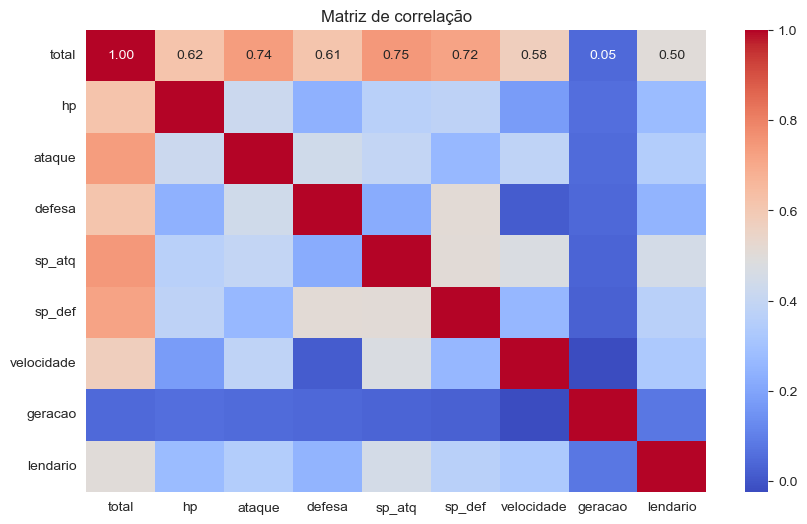

In [22]:
# Vamos verificar a correlação entre as variáveis usando um gráfico de calor, primeiro método sendo de Pearson

corr_matrix = df_norm.corr() # Calcula a matriz de correlação

plt.figure(figsize= (10, 6)) # Define o tamanho da figura
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt=".2f") # Cria o gráfico de calor
plt.title("Matriz de correlação") # Define o título do gráfico
plt.show() # Exibe o gráfico


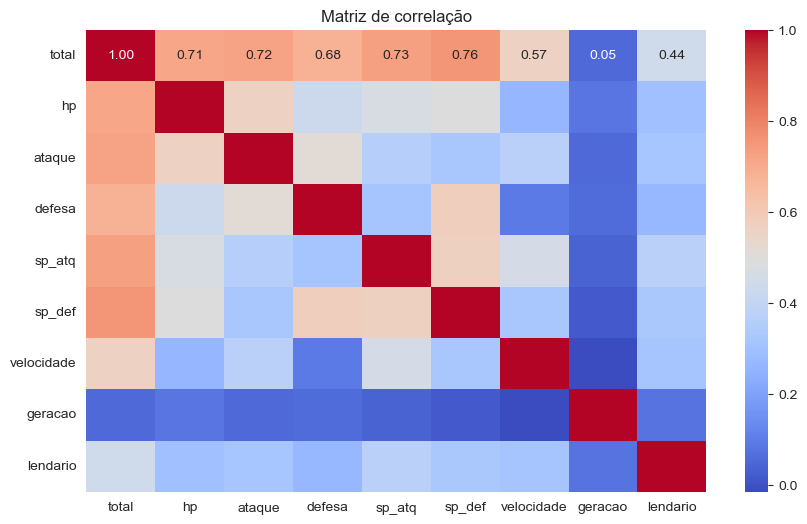

In [23]:
# Gráfico de spearman

plt.figure(figsize= (10, 6)) # Define o tamanho da figura
sns.heatmap(df_norm.corr(method='spearman'), annot= True, cmap= 'coolwarm', fmt=".2f") # Cria o gráfico de calor
plt.title("Matriz de correlação") # Define o título do gráfico
plt.show() # Exibe o gráfico

Com esse gráfico, notamos que há pouca correlação entre as variáveis, o que é bom para o modelo. Não será necessário remover ou tratar nenhuma variável.

 *  Lembrando que a leitura desse gráfico se dá pelo seguinte:
    -   Quanto mais próximo de 1, mais forte é a correlação positiva entre as variáveis; - algo ruim
    -   Quanto mais próximo de -1, mais forte é a correlação negativa entre as variáveis; - também é algo ruim
    -   Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis. - algo bom

Variáveis com alta correlação ou correlação invertida podem ser um problema para o modelo, pois ele não saberá qual variável é mais importante para a previsão, além de que o modelo também não consegue analisar a importância da individualidade da classe. Isso pode causar overfitting, ou seja, o modelo se ajusta muito bem aos dados de treino, mas não consegue generalizar para novos dados.

In [24]:
# Usando o ppscore para calcular a matriz de correlação de uma forma mais textual e detalhada, com mais informações, sendo visual cada comparação entre as variáveis.

pd.set_option('display.max_rows', 100) # Define o número máximo de linhas a serem exibidas.

analise_corr = pps.matrix(df_norm) # Calcula a matriz de correlação usando o PPS.
analise_corr

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,total,total,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,total,hp,0.211419,regression,True,mean absolute error,0.733237,0.578216,DecisionTreeRegressor()
2,total,ataque,0.262245,regression,True,mean absolute error,0.791648,0.584043,DecisionTreeRegressor()
3,total,defesa,0.158221,regression,True,mean absolute error,0.753514,0.634292,DecisionTreeRegressor()
4,total,sp_atq,0.271533,regression,True,mean absolute error,0.791546,0.576615,DecisionTreeRegressor()
5,total,sp_def,0.249782,regression,True,mean absolute error,0.785915,0.589608,DecisionTreeRegressor()
6,total,velocidade,0.117317,regression,True,mean absolute error,0.819064,0.722974,DecisionTreeRegressor()
7,total,geracao,0.018959,regression,True,mean absolute error,1.418750,1.391852,DecisionTreeRegressor()
8,total,lendario,0.485204,regression,True,mean absolute error,0.081250,0.041827,DecisionTreeRegressor()
9,hp,total,0.351088,regression,True,mean absolute error,0.833528,0.540886,DecisionTreeRegressor()


### Plotagem de dados, Scatter, Matriz de confusão e Linha de saída.

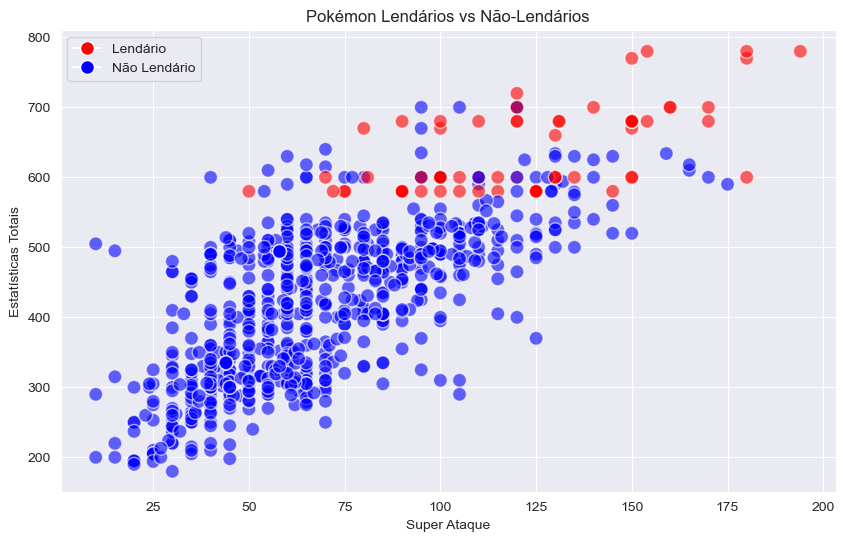

In [25]:
# Começando com o Scatter

# Não será necessário nenhum tratamento adicional, pois o dataset já está tratado e normalizado.

atk = df['sp_atq'] # Pegar apenas a coluna 'sp_atq'
total = df['total'] # Pegar apenas a coluna 'total'
colors = df['lendario'].map({1: 'red', 0: 'blue'})  # Mapear as cores dos pontos conforme a coluna 'lendario'

# Criar gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(atk, total, c=colors, alpha=0.6, edgecolors='w', s=100)

# Adicionar títulos e rótulos
plt.title('Pokémon Lendários vs Não-Lendários')
plt.xlabel('Super Ataque')
plt.ylabel('Estatísticas Totais')

# Adicionar legenda
red_patch = plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Lendário')
blue_patch = plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='blue', markersize=10, label= 'Não Lendário')
plt.legend(handles=[red_patch, blue_patch])

# Mostra o gráfico
plt.show()

In [26]:
# Aqui será usada a árvore de decisão (DecisionTree) para fazer a classificação dos pokemons lendários e não lendários.
clf = DecisionTreeClassifier(random_state=42)

In [27]:
clf.fit(X_smote, y_smote) # Treina o modelo com os dados de treino.

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = clf.predict(X_test) # Faz a previsão do modelo com os dados de teste.

C:\Users\vinissoissoisso\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


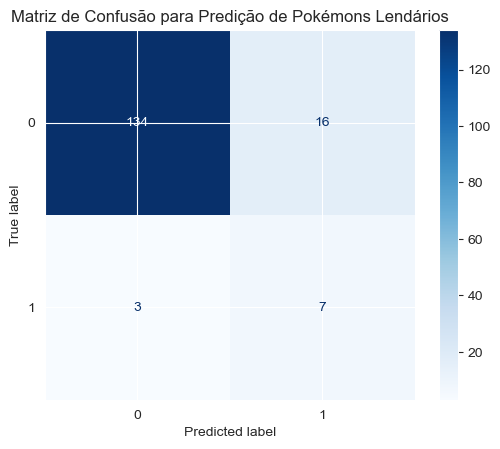

In [29]:
cm = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão para Predição de Pokémons Lendários')
plt.show()

#### Esse nosso modelo não ficou muito bom, pois ele não conseguiu prever corretamente os pokemons lendários, o que é o nosso foco. Talvez seja por conta da quantidade de dados, ou por conta da quantidade de variáveis que não são tão relevantes para a previsão.

In [30]:
### Irei criar um modelo, mas agora com as variáveis mais relevantes para a previsão. Irei rebalancear as classes usando o RandomUnderSampling.

In [31]:
df_confusao = df.copy()
df_confusao

,nome,tipo_1,tipo_2,total,hp,ataque,defesa,sp_atq,sp_def,velocidade,geracao,lendario
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [32]:
df_confusao.drop(columns=['nome', 'tipo_1', 'tipo_2'], inplace= True)

X = df_confusao.drop(columns=["lendario"]) # Coletando tudo do dataset, menos a coluna 'lendario'.
y = df_confusao['lendario']

In [33]:
rus = RandomUnderSampler(random_state=42) # Instancia o RandomUnderSampler

X_reUsampled, y_reUsampled = rus.fit_resample(X, y) # Balanceia as classes que separamos com o RandomUnderSampler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reUsampled, y_reUsampled, test_size=0.2, random_state=42)

In [35]:
clf2 = DecisionTreeClassifier(random_state= 42)

0    65
1    65
Name: lendario, dtype: int64

In [ ]:
clf2.fit(X_train, y_train) # Treina o modelo com os dados de treino.

In [41]:
y_pred = clf2.predict(X_test) # Faz a previsão do modelo com os dados de teste.

In [42]:
cm2 = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão

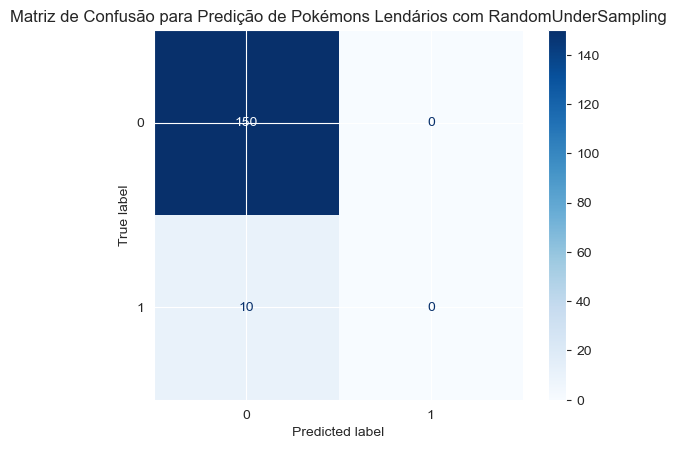

In [43]:
disp2 = ConfusionMatrixDisplay(confusion_matrix= cm2, display_labels=clf2.classes_)
disp2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão para Predição de Pokémons Lendários com RandomUnderSampling')
plt.show()

### Realizar a seleção de variáveis

In [ ]:
# Vamos selecionar as variáveis mais importantes na hora de prever se um pokémon é lendário ou não.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Instancia o SelectKBest
seletor = SelectKBest(score_func=chi2, k=4) # O score_func é a função que será usada para calcular a importância das variáveis. O chi2 é uma função estatística que calcula a relação entre variáveis categóricas.
X_selecionado = seletor.fit_transform(X_smote, y_smote) # Seleciona as variáveis mais importantes já escaladas com o smote, ou seja, com os dados balanceados dos pokemons lendários e não lendários. Evitando assim, um viés na seleção das variáveis.

X_selecionado

In [ ]:
# Vamos ver quais variáveis foram selecionadas
seletor.get_support() # Retorna um array booleano indicando as variáveis selecionadas
# Vamos ver o nome das variáveis selecionadas
X.columns[seletor.get_support()] # Retorna o nome das variáveis selecionadas

In [ ]:
# Importância das Variáveis Selecionadas pelo SelectKBest
# Este plot mostra a importância das variáveis selecionadas pelo SelectKBest usando o score Chi2.
# Quanto maior o valor do score, mais importante é a variável na previsão se um Pokémon é lendário ou não.
# As variáveis selecionadas são aquelas que têm os maiores scores de Chi2.
plt.figure(figsize=(10, 6))
plt.bar(range(len(seletor.scores_)), seletor.scores_, tick_label=X.columns)
plt.title('Importância das Variáveis Selecionadas pelo SelectKBest')
plt.xlabel('Variáveis')
plt.ylabel('Score Chi2')
plt.xticks(rotation=45, ha='right')
plt.show()

Aqui vemos que as variáveis que mais dizem algo relevante, onde há mais discrepâncias e dados valiosos estão nas colunas "total", "sp_atq" (superataque), "sp_def" (superdefesa) e "velocidade"